# 1. Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import pickle
from mlxtend.frequent_patterns.fpgrowth import fpgrowth

In [10]:
school_dict = pickle.load(open("dictionary/school_level_dict.pkl",'rb'))

In [8]:
subject='Agricultural Science'
course ='SSS One'

In [6]:
lesson_rec_rules=pickle.load(open(str('lessons/')+lesson_dict[subject+'_'+course],'rb'))

In [11]:
course_rec_rules= pickle.load(open(str('subjects/')+school_dict[str(course)+' science'],'rb'))

In [12]:
course_rec_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2861,"(Physics, Data Processing)","(Computer Science, Chemistry, Mathematics)",0.013193,0.010554,0.010554,0.800000,75.800000,0.010415,4.947230
2947,"(Computer Science, Chemistry, Biology, Mathema...","(Physics, Data Processing)",0.010554,0.013193,0.010554,1.000000,75.800000,0.010415,inf
2964,"(Physics, Biology, Data Processing)","(Computer Science, Chemistry, Mathematics)",0.013193,0.010554,0.010554,0.800000,75.800000,0.010415,4.947230
2961,"(Computer Science, Chemistry, Mathematics)","(Physics, Biology, Data Processing)",0.010554,0.013193,0.010554,1.000000,75.800000,0.010415,inf
2852,"(Computer Science, Chemistry, Mathematics)","(Physics, Data Processing)",0.010554,0.013193,0.010554,1.000000,75.800000,0.010415,inf
...,...,...,...,...,...,...,...,...,...
19,(Physics),(Agricultural Science),0.218997,0.155673,0.029024,0.132530,0.851338,-0.005068,0.973322
40,(Chemistry),(Data Processing),0.274406,0.068602,0.015831,0.057692,0.840976,-0.002994,0.988423
41,(Data Processing),(Chemistry),0.068602,0.274406,0.015831,0.230769,0.840976,-0.002994,0.943272
90,(Economics),(Yoruba),0.184697,0.089710,0.010554,0.057143,0.636975,-0.006015,0.965459


# 2. Data preprocessing

In [2]:
#courses
classes = pd.read_csv(r"C:\Users\alomo\Documents\Afrilearn Project\unicef_afrilearn\reunicefdata\new data\courses.csv")

In [3]:
classes.head()

,_id,name,alias,imageUrl,categoryId,createdAt,updatedAt,__v,enrollee
0,5fc8cfbb81a55b4c3c19737d,Primary One,Primary One,https://afrilearn.s3.amazonaws.com/pencil.png,605b21868636bc00158b4ad6,2020-12-03T11:45:00.148Z,2021-03-24T11:27:23.867Z,0,4.0
1,5fd12c70e74b15663c5f4c6e,Primary Two,Primary two,https://afrilearn.s3.amazonaws.com/pencil.png,605b21868636bc00158b4ad6,2020-12-09T19:59:10.480Z,2021-04-19T09:48:51.389Z,0,4.0
2,5fff5a67de0bdb47f826fea8,Primary Three,Primary Three,https://afrilearn.s3.amazonaws.com/pencil.png,605b21868636bc00158b4ad6,2020-12-09T19:59:10.480Z,2021-03-24T11:34:37.412Z,0,4.0
3,5fff5a7ede0bdb47f826fea9,Primary Four,Primary Four,https://afrilearn.s3.amazonaws.com/pencil.png,605b21868636bc00158b4ad6,2020-12-09T19:59:10.480Z,2021-04-19T09:49:03.635Z,0,4.0
4,5fff5aaede0bdb47f826feaa,Primary Five,Primary Five,https://afrilearn.s3.amazonaws.com/pencil.png,605b21868636bc00158b4ad6,2020-12-09T19:59:10.480Z,2021-04-19T09:49:19.997Z,0,4.0


<AxesSubplot:xlabel='name', ylabel='enrollee'>

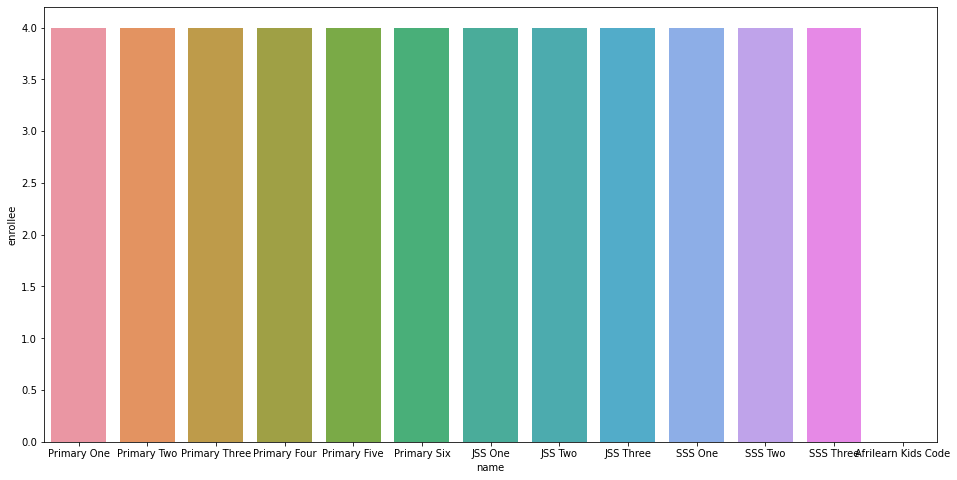

In [4]:
plt.figure(figsize=(16,8))
sns.barplot(data=classes, x = 'name', y='enrollee')

In [5]:
classes[['name','enrollee']].groupby(by=['name']).sum()

,enrollee
name,
Afrilearn Kids Code,0.0
JSS One,4.0
JSS Three,4.0
JSS Two,4.0
Primary Five,4.0
Primary Four,4.0
Primary One,4.0
Primary Six,4.0
Primary Three,4.0


In [6]:
classes['name'].unique() # The classes represent all the student's levels from Primary One to SS3"

array(['Primary One', 'Primary Two', 'Primary Three', 'Primary Four',
       'Primary Five', 'Primary Six', 'JSS One', 'JSS Two', 'JSS Three',
       'SSS One', 'SSS Two', 'SSS Three', 'Afrilearn Kids Code'],
      dtype=object)

In [7]:
classes['_id'].unique()

array(['5fc8cfbb81a55b4c3c19737d', '5fd12c70e74b15663c5f4c6e',
       '5fff5a67de0bdb47f826fea8', '5fff5a7ede0bdb47f826fea9',
       '5fff5aaede0bdb47f826feaa', '5fff5abede0bdb47f826feab',
       '5fff72b3de0bdb47f826feaf', '5fff7329de0bdb47f826feb0',
       '5fff734ade0bdb47f826feb1', '5fff7371de0bdb47f826feb2',
       '5fff7380de0bdb47f826feb3', '5fff7399de0bdb47f826feb4',
       '629dbb4c5a5f270016033712'], dtype=object)

In [8]:
#lessons
lessons = pd.read_csv(r"C:\Users\alomo\Documents\Afrilearn Project\unicef_afrilearn\reunicefdata\new data\lessons.csv")

In [9]:
lessons.head()

,_id,likes,views,subjectId,courseId,termId,title,content,updatedAt,createdAt,videoUrls,thumbnailUrl,__v
0,6012bdcecfe09249249f7e9c,[],56.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Drawing And Labeling Of Farm Tools,"<p>Back to: <a class=""on"">Agricultural Science...",2022-05-22T17:17:40.413Z,2021-08-02T12:52:44.000Z,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",https://afrilearn-media.s3.eu-west-3.amazonaws...,1.0
1,6012bdcecfe09249249f7e9e,[],21.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Types Of Insect And Part (Cockroach),Welcome to class.\r\n\r\nInsects are small cre...,2022-05-21T14:55:23.979Z,2021-06-22T14:30:54.892Z,[],NaN,5.0
2,6012bdcecfe09249249f7ea0,[],4.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Useful And Harmful Insect,Welcome to class.\r\n\r\nInsect are small crea...,2022-03-25T10:05:56.054Z,2021-08-13T11:33:27.464Z,[],NaN,2.0
3,6012bdcecfe09249249f7ea2,[],1.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Controlling Harmful Insects,Welcome to class.\r\n\r\nHarmful insects are t...,2022-03-21T08:56:56.110Z,2021-08-13T11:30:47.016Z,[],NaN,2.0
4,6012bdcecfe09249249f7ea4,NaN,NaN,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Farmers Friend (Earthworm),Welcome to class.\r\n\r\nThe earthworm is a lo...,NaN,NaN,[],NaN,1.0


In [10]:
lessons['termId'].nunique()

3

In [11]:
lessons['subjectId'].nunique()

160

In [12]:
lessons['title'].nunique()

3489

In [13]:
lessons.head(10)

,_id,likes,views,subjectId,courseId,termId,title,content,updatedAt,createdAt,videoUrls,thumbnailUrl,__v
0,6012bdcecfe09249249f7e9c,[],56.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Drawing And Labeling Of Farm Tools,"<p>Back to: <a class=""on"">Agricultural Science...",2022-05-22T17:17:40.413Z,2021-08-02T12:52:44.000Z,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",https://afrilearn-media.s3.eu-west-3.amazonaws...,1.0
1,6012bdcecfe09249249f7e9e,[],21.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Types Of Insect And Part (Cockroach),Welcome to class.\r\n\r\nInsects are small cre...,2022-05-21T14:55:23.979Z,2021-06-22T14:30:54.892Z,[],NaN,5.0
2,6012bdcecfe09249249f7ea0,[],4.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Useful And Harmful Insect,Welcome to class.\r\n\r\nInsect are small crea...,2022-03-25T10:05:56.054Z,2021-08-13T11:33:27.464Z,[],NaN,2.0
3,6012bdcecfe09249249f7ea2,[],1.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Controlling Harmful Insects,Welcome to class.\r\n\r\nHarmful insects are t...,2022-03-21T08:56:56.110Z,2021-08-13T11:30:47.016Z,[],NaN,2.0
4,6012bdcecfe09249249f7ea4,NaN,NaN,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Farmers Friend (Earthworm),Welcome to class.\r\n\r\nThe earthworm is a lo...,NaN,NaN,[],NaN,1.0
5,6012bdcecfe09249249f7ea8,NaN,NaN,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Description Of Farmers Enemies,Welcome to class.\r\n\r\nFarmer’s enemies affe...,NaN,NaN,[],NaN,1.0
6,6012bdcecfe09249249f7eaa,[],2.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Method Of Controlling Farmers Enemies,Welcome to class.\r\n\r\nFarmer’s enemies shou...,2022-05-21T14:56:31.989Z,2022-05-21T14:56:06.096Z,[],NaN,2.0
7,6012bdcecfe09249249f7ea6,NaN,NaN,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Enemies Of Farmers (Rodent & Birds),"<span style=""font-size: 16px;"">Welcome to clas...",NaN,NaN,[],NaN,1.0
8,6012bdd3cfe09249249f7eac,[],1.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,600047f67cabf80f88f61735,Gathering And Carrying Tools,Welcome to class.\r\n\r\nGathering and carryin...,2022-01-06T13:34:11.617Z,2022-01-06T13:34:11.617Z,[],NaN,2.0
9,6012bdd3cfe09249249f7eae,[],1.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,600047f67cabf80f88f61735,Uses Of Gathering And Carrying Tools,Welcome to class.\r\n<ul>\r\n \t<li>Rake</li>\...,2022-01-06T13:34:51.350Z,2022-01-06T13:34:51.350Z,[],NaN,2.0


In [14]:
lislessons.videoUrls[0]

'[{"_id":{"$oid":"61599bbe0d83c53834563589"},"transcript":"<p>Transcript</p>","videoUrl":"https://youtu.be/St53lTNJyVc"},{"_id":{"$oid":"615b2916edb75e5158c1765a"},"transcript":"<p>https://youtu.be/X2H1Ilg4RWYhttps://youtu.be/X2H1Ilg4RWY<br></p>","videoUrl":"https://youtu.be/X2H1Ilg4RWY"}]'

In [1]:
lessons['videoUrls'].str.replace(",","")

NameError: name 'lessons' is not defined

In [15]:
lessons

,_id,likes,views,subjectId,courseId,termId,title,content,updatedAt,createdAt,videoUrls,thumbnailUrl,__v
0,6012bdcecfe09249249f7e9c,[],56.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Drawing And Labeling Of Farm Tools,"<p>Back to: <a class=""on"">Agricultural Science...",2022-05-22T17:17:40.413Z,2021-08-02T12:52:44.000Z,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",https://afrilearn-media.s3.eu-west-3.amazonaws...,1.0
1,6012bdcecfe09249249f7e9e,[],21.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Types Of Insect And Part (Cockroach),Welcome to class.\r\n\r\nInsects are small cre...,2022-05-21T14:55:23.979Z,2021-06-22T14:30:54.892Z,[],NaN,5.0
2,6012bdcecfe09249249f7ea0,[],4.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Useful And Harmful Insect,Welcome to class.\r\n\r\nInsect are small crea...,2022-03-25T10:05:56.054Z,2021-08-13T11:33:27.464Z,[],NaN,2.0
3,6012bdcecfe09249249f7ea2,[],1.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Controlling Harmful Insects,Welcome to class.\r\n\r\nHarmful insects are t...,2022-03-21T08:56:56.110Z,2021-08-13T11:30:47.016Z,[],NaN,2.0
4,6012bdcecfe09249249f7ea4,NaN,NaN,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Farmers Friend (Earthworm),Welcome to class.\r\n\r\nThe earthworm is a lo...,NaN,NaN,[],NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3732,62a08b540b99530016d3474e,[],0.0,629dbfc65a5f2700160337ad,629dbb4c5a5f270016033712,600048197cabf80f88f61736,Loops in Javascript,"<p><span style=""background-color: transparent;...",2022-06-08T11:43:16.530Z,2022-06-08T11:43:16.530Z,"[{""_id"":{""$oid"":""62a08b540b99530016d3474f""},""v...",NaN,0.0
3733,62a08d730b99530016d3475b,[],0.0,629dbfc65a5f2700160337ad,629dbb4c5a5f270016033712,600048197cabf80f88f61736,Javascript Scope and Hoisting,"<p><span style=""color: rgb(32, 33, 36); font-f...",2022-06-08T11:52:19.190Z,2022-06-08T11:52:19.190Z,"[{""_id"":{""$oid"":""62a08d730b99530016d3475c""},""v...",NaN,0.0
3734,62a08ea70b99530016d34768,[],0.0,629dbfc65a5f2700160337ad,629dbb4c5a5f270016033712,600048197cabf80f88f61736,ASYNC and AWAIT,"<p><span style=""color: rgb(32, 33, 36); font-f...",2022-06-08T11:57:27.335Z,2022-06-08T11:57:27.335Z,"[{""_id"":{""$oid"":""62a08ea70b99530016d34769""},""v...",NaN,0.0
3735,62a094e10b99530016d3478a,[],0.0,629dbfc65a5f2700160337ad,629dbb4c5a5f270016033712,600048197cabf80f88f61736,Javascript HTML DOM Methods,"<p><span style=""background-color: transparent;...",2022-06-08T22:52:09.662Z,2022-06-08T12:24:01.333Z,"[{""_id"":{""$oid"":""62a1281900a999001621d36e""},""t...",NaN,0.0


In [16]:
lessons[['_id','views','subjectId','courseId','termId','content','title']]

,_id,views,subjectId,courseId,termId,title
0,6012bdcecfe09249249f7e9c,56.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Drawing And Labeling Of Farm Tools
1,6012bdcecfe09249249f7e9e,21.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Types Of Insect And Part (Cockroach)
2,6012bdcecfe09249249f7ea0,4.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Useful And Harmful Insect
3,6012bdcecfe09249249f7ea2,1.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Controlling Harmful Insects
4,6012bdcecfe09249249f7ea4,NaN,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Farmers Friend (Earthworm)
...,...,...,...,...,...,...
3732,62a08b540b99530016d3474e,0.0,629dbfc65a5f2700160337ad,629dbb4c5a5f270016033712,600048197cabf80f88f61736,Loops in Javascript
3733,62a08d730b99530016d3475b,0.0,629dbfc65a5f2700160337ad,629dbb4c5a5f270016033712,600048197cabf80f88f61736,Javascript Scope and Hoisting
3734,62a08ea70b99530016d34768,0.0,629dbfc65a5f2700160337ad,629dbb4c5a5f270016033712,600048197cabf80f88f61736,ASYNC and AWAIT
3735,62a094e10b99530016d3478a,0.0,629dbfc65a5f2700160337ad,629dbb4c5a5f270016033712,600048197cabf80f88f61736,Javascript HTML DOM Methods


In [17]:
#main subjects
mainsubjects = pd.read_csv(r"C:\Users\alomo\Documents\Afrilearn Project\unicef_afrilearn\reunicefdata\new data\mainsubjects.csv")

In [18]:
mainsubjects.head(10)

,_id,name,introText,classification,imageUrl,createdAt,updatedAt,__v
0,5fca6b75724ea10be8d7118b,English,"In this Class, you will learn all English Lang...",Languages,https://afrilearn-media.s3.eu-west-3.amazonaws...,2020-12-04T17:01:41.662Z,2020-12-04T17:01:41.662Z,0
1,5fca6ba720ae17154494ce76,Mathematics,"In this Class, you will learn all Mathematics ...",Calculation,https://afrilearn-media.s3.eu-west-3.amazonaws...,2020-12-04T17:02:31.260Z,2020-12-04T17:02:31.260Z,0
2,5ffef619de0bdb47f826fea2,Basic Technology,"In this Class, you will learn all Basic Techno...",Languages,https://afrilearn-media.s3.eu-west-3.amazonaws...,2020-12-04T17:01:41.662Z,2020-12-04T17:01:41.662Z,0
3,5ffef6c2de0bdb47f826fea3,Basic Science,"In this Class, you will learn all Basic Scienc...",Languages,https://afrilearn-media.s3.eu-west-3.amazonaws...,2020-12-04T17:01:41.662Z,2020-12-04T17:01:41.662Z,0
4,5ffef6e2de0bdb47f826fea4,Social Studies,"In this Class, get all Social Study topics fr...",Languages,https://afrilearn-media.s3.eu-west-3.amazonaws...,2020-12-04T17:01:41.662Z,2020-12-04T17:01:41.662Z,0
5,5ffef6f2de0bdb47f826fea5,Business Studies,"In this Class, you will learn all Business Stu...",Languages,https://afrilearn-media.s3.eu-west-3.amazonaws...,2020-12-04T17:01:41.662Z,2020-12-04T17:01:41.662Z,0
6,5ffef70cde0bdb47f826fea6,Physical Health Education,"In this Class, you will learn all Physical Edu...",Languages,https://afrilearn-media.s3.eu-west-3.amazonaws...,2020-12-04T17:01:41.662Z,2020-12-04T17:01:41.662Z,0
7,5ffef71ade0bdb47f826fea7,Civic Education,"In this Class, you will learn all Civic Educat...",Languages,https://afrilearn-media.s3.eu-west-3.amazonaws...,2020-12-04T17:01:41.662Z,2020-12-04T17:01:41.662Z,0
8,60115b97f05815325d1a9dfb,Agricultural Science,"In this Class, you will learn all Agricultural...",Languages,https://afrilearn-media.s3.eu-west-3.amazonaws...,2020-12-04T17:01:41.662Z,2020-12-04T17:01:41.662Z,0
9,60115c82f05815325d1a9dfc,Christian Religious Study,"In this Class, you will learn all Christian Re...",Languages,https://afrilearn-media.s3.eu-west-3.amazonaws...,2020-12-04T17:01:41.662Z,2020-12-04T17:01:41.662Z,0


In [19]:
mainsubjects['name'].nunique()

30

In [20]:
mainsubjects['_id'].nunique()

30

In [21]:
#subjects
subjects = pd.read_csv(r"C:\Users\alomo\Documents\Afrilearn Project\unicef_afrilearn\reunicefdata\new data\subjects.csv")

In [22]:
subjects.head(10)

,_id,mainSubjectId,courseId,__v
0,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,0
1,5fff5c253fd2d54b08047c83,5ffef619de0bdb47f826fea2,5fc8cfbb81a55b4c3c19737d,0
2,5fff5c313fd2d54b08047c84,60115c82f05815325d1a9dfc,5fc8cfbb81a55b4c3c19737d,0
3,5fff5c473fd2d54b08047c85,5ffef71ade0bdb47f826fea7,5fc8cfbb81a55b4c3c19737d,0
4,5fff5c553fd2d54b08047c86,60115cccf05815325d1a9dfe,5fc8cfbb81a55b4c3c19737d,0
5,5fff5c683fd2d54b08047c87,5fca6b75724ea10be8d7118b,5fc8cfbb81a55b4c3c19737d,0
6,5fff5c753fd2d54b08047c88,60115d23f05815325d1a9dff,5fc8cfbb81a55b4c3c19737d,0
7,5fff5c883fd2d54b08047c89,5fca6ba720ae17154494ce76,5fc8cfbb81a55b4c3c19737d,0
8,5fff5ca23fd2d54b08047c8a,5ffef6e2de0bdb47f826fea4,5fc8cfbb81a55b4c3c19737d,0
9,5fff5cb03fd2d54b08047c8b,60115df1f05815325d1a9e00,5fc8cfbb81a55b4c3c19737d,0


In [23]:
df = subjects.merge(mainsubjects[['_id','name']],left_on=['mainSubjectId'],right_on=['_id'],how='inner')

In [24]:
df = df.drop(['_id_y','__v'],axis=1)
df = df.rename(columns={'_id_x':'subjectId'})
df = df.merge(classes[['_id','name']],left_on=['courseId'],right_on=['_id'],how='inner')
df = df.drop(['_id'],axis=1)
df = df.rename(columns={'name_x':'subject_name','name_y':'class_name'})

In [25]:
df = df.rename(columns={'_id_x':'subjectId'})

In [26]:
df = df.merge(classes[['_id','name']],left_on=['courseId'],right_on=['_id'],how='inner')

In [27]:
df = df.drop(['_id'],axis=1)

In [28]:
df = df.drop(['_id'],axis=1)
df = df.rename(columns={'name_x':'subject_name','name_y':'class_name'})

In [29]:
df.head()

,subjectId,mainSubjectId,courseId,subject_name,class_name
0,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One
1,5fff5c253fd2d54b08047c83,5ffef619de0bdb47f826fea2,5fc8cfbb81a55b4c3c19737d,Basic Technology,Primary One
2,5fff5c313fd2d54b08047c84,60115c82f05815325d1a9dfc,5fc8cfbb81a55b4c3c19737d,Christian Religious Study,Primary One
3,5fff5c473fd2d54b08047c85,5ffef71ade0bdb47f826fea7,5fc8cfbb81a55b4c3c19737d,Civic Education,Primary One
4,5fff5c553fd2d54b08047c86,60115cccf05815325d1a9dfe,5fc8cfbb81a55b4c3c19737d,Creative Cultural Arts,Primary One


In [30]:
df.to_csv("lesson_database.csv")

In [31]:
df = df.merge(lessons[['_id','views','subjectId','courseId','termId','videoUrls','title']],left_on=['subjectId','courseId'],right_on=['subjectId','courseId'],how='right')

In [32]:
df = df.rename(columns={'_id':'lessonId'})

In [33]:
df.head()

,subjectId,mainSubjectId,courseId,subject_name,class_name,lessonId,views,termId,videoUrls,title
0,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",Drawing And Labeling Of Farm Tools
1,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9e,21.0,5fc8d1b20fae0a06bc22db5c,[],Types Of Insect And Part (Cockroach)
2,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7ea0,4.0,5fc8d1b20fae0a06bc22db5c,[],Useful And Harmful Insect
3,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7ea2,1.0,5fc8d1b20fae0a06bc22db5c,[],Controlling Harmful Insects
4,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7ea4,NaN,5fc8d1b20fae0a06bc22db5c,[],Farmers Friend (Earthworm)


In [34]:
df[df['lessonId'].isna()]

,subjectId,mainSubjectId,courseId,subject_name,class_name,lessonId,views,termId,videoUrls,title


In [35]:
df[df['class_name']=='Primary One']

,subjectId,mainSubjectId,courseId,subject_name,class_name,lessonId,views,termId,videoUrls,title
0,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",Drawing And Labeling Of Farm Tools
1,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9e,21.0,5fc8d1b20fae0a06bc22db5c,[],Types Of Insect And Part (Cockroach)
2,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7ea0,4.0,5fc8d1b20fae0a06bc22db5c,[],Useful And Harmful Insect
3,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7ea2,1.0,5fc8d1b20fae0a06bc22db5c,[],Controlling Harmful Insects
4,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7ea4,NaN,5fc8d1b20fae0a06bc22db5c,[],Farmers Friend (Earthworm)
...,...,...,...,...,...,...,...,...,...,...
196,5fff5cb03fd2d54b08047c8b,60115df1f05815325d1a9e00,5fc8cfbb81a55b4c3c19737d,Yoruba,Primary One,6012c2e3cfe09249249f8024,NaN,600048197cabf80f88f61736,[],ÀFIWÉ ÌRÓ ÈDÈ GẸ̀Ẹ́SI ÀTI ÌRÓ ÈDE...
197,5fff5cb03fd2d54b08047c8b,60115df1f05815325d1a9e00,5fc8cfbb81a55b4c3c19737d,Yoruba,Primary One,6012c2e3cfe09249249f8026,NaN,600048197cabf80f88f61736,[],ÒǸKÀ II: OÓKÀNLÁ DÉ OGÚN (Counting 11...
198,5fff5cb03fd2d54b08047c8b,60115df1f05815325d1a9e00,5fc8cfbb81a55b4c3c19737d,Yoruba,Primary One,6012c2e3cfe09249249f8028,NaN,600048197cabf80f88f61736,[],ỌJỌ́ TÓ WÀ NÍNÚ Ọ̀SẸ̀ ( Days of the week)
199,5fff5cb03fd2d54b08047c8b,60115df1f05815325d1a9e00,5fc8cfbb81a55b4c3c19737d,Yoruba,Primary One,6012c2e3cfe09249249f802a,NaN,600048197cabf80f88f61736,[],ORIN AKỌ́MỌNÍWÀ ( Moral sounds)


In [36]:
lessons.head()

,_id,likes,views,subjectId,courseId,termId,title,content,updatedAt,createdAt,videoUrls,thumbnailUrl,__v
0,6012bdcecfe09249249f7e9c,[],56.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Drawing And Labeling Of Farm Tools,"<p>Back to: <a class=""on"">Agricultural Science...",2022-05-22T17:17:40.413Z,2021-08-02T12:52:44.000Z,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",https://afrilearn-media.s3.eu-west-3.amazonaws...,1.0
1,6012bdcecfe09249249f7e9e,[],21.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Types Of Insect And Part (Cockroach),Welcome to class.\r\n\r\nInsects are small cre...,2022-05-21T14:55:23.979Z,2021-06-22T14:30:54.892Z,[],NaN,5.0
2,6012bdcecfe09249249f7ea0,[],4.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Useful And Harmful Insect,Welcome to class.\r\n\r\nInsect are small crea...,2022-03-25T10:05:56.054Z,2021-08-13T11:33:27.464Z,[],NaN,2.0
3,6012bdcecfe09249249f7ea2,[],1.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Controlling Harmful Insects,Welcome to class.\r\n\r\nHarmful insects are t...,2022-03-21T08:56:56.110Z,2021-08-13T11:30:47.016Z,[],NaN,2.0
4,6012bdcecfe09249249f7ea4,NaN,NaN,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Farmers Friend (Earthworm),Welcome to class.\r\n\r\nThe earthworm is a lo...,NaN,NaN,[],NaN,1.0


# Recent Activities

In [37]:
#recentactivities
recent_activities = pd.read_csv(r"C:\Users\alomo\Documents\Afrilearn Project\unicef_afrilearn\reunicefdata\recentactivities.csv")

In [38]:
recent_activities.head(10)

,_id,lessonId,type,userId,createdAt,updatedAt,__v
0,609a3909f3e4905f0001f3de,6012d1b0cfe09249249f8954,lesson,6096464f42cd50554895e250,2021-05-11T07:58:01.630Z,2021-05-11T07:58:01.630Z,0
1,609a3a8bf3e4905f0001f3e0,6012cec2cfe09249249f88fe,lesson,6096464f42cd50554895e250,2021-05-11T08:04:27.541Z,2021-05-11T08:04:27.541Z,0
2,609a4259f3e4905f0001f3e2,6012d293cfe09249249f89bc,lesson,6096464f42cd50554895e250,2021-05-11T08:37:45.403Z,2021-05-11T08:37:45.403Z,0
3,609a42dff3e4905f0001f3e5,6012d293cfe09249249f89bc,lesson,6096464f42cd50554895e250,2021-05-11T08:39:59.882Z,2021-05-11T08:39:59.882Z,0
4,609a42dff3e4905f0001f3e6,6012d293cfe09249249f89bc,lesson,6096464f42cd50554895e250,2021-05-11T08:39:59.896Z,2021-05-11T08:39:59.896Z,0
5,609a43b6f3e4905f0001f3e9,6012cec2cfe09249249f88fe,lesson,6096464f42cd50554895e250,2021-05-11T08:43:34.752Z,2021-05-11T08:43:34.752Z,0
6,609a44dff3e4905f0001f3eb,6012cec2cfe09249249f88fe,lesson,603fdf31a36c060015655272,2021-05-11T08:48:31.517Z,2021-05-11T08:48:31.517Z,0
7,609a44e8f3e4905f0001f3ec,6012cec2cfe09249249f88fe,lesson,603fdf31a36c060015655272,2021-05-11T08:48:40.838Z,2021-05-11T08:48:40.838Z,0
8,609a4608f3e4905f0001f3ef,6012d293cfe09249249f89bc,lesson,603fdf31a36c060015655272,2021-05-11T08:53:28.177Z,2021-05-11T08:53:28.177Z,0
9,609a460df3e4905f0001f3f1,6012d293cfe09249249f89bc,lesson,603fdf31a36c060015655272,2021-05-11T08:53:33.537Z,2021-05-11T08:53:33.537Z,0


In [39]:
recent_activities.userId.nunique()

2445

In [40]:
len(df)

3737

In [41]:
df = df.merge(recent_activities[['lessonId','userId']],left_on='lessonId',right_on='lessonId',how='left')

In [42]:
import string
import random

In [43]:
import string
import random
df['userId'] = df['userId'].apply(lambda x: ''.join(random.choice(string.ascii_lowercase) for i in range(24)) if x!=x else x)

In [44]:
school_level = df.courseId.unique()
school_level

array(['5fc8cfbb81a55b4c3c19737d', '5fd12c70e74b15663c5f4c6e',
       '5fff5a67de0bdb47f826fea8', '5fff5a7ede0bdb47f826fea9',
       '5fff5aaede0bdb47f826feaa', '5fff5abede0bdb47f826feab',
       '5fff72b3de0bdb47f826feaf', '5fff7329de0bdb47f826feb0',
       '5fff734ade0bdb47f826feb1', '5fff7371de0bdb47f826feb2',
       '5fff7380de0bdb47f826feb3', '5fff7399de0bdb47f826feb4',
       '629dbb4c5a5f270016033712'], dtype=object)

In [45]:
df

,subjectId,mainSubjectId,courseId,subject_name,class_name,lessonId,views,termId,videoUrls,title,userId
0,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",Drawing And Labeling Of Farm Tools,60941a8a1523405f74ddb94e
1,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",Drawing And Labeling Of Farm Tools,60941a8a1523405f74ddb94e
2,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",Drawing And Labeling Of Farm Tools,60941a8a1523405f74ddb94e
3,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",Drawing And Labeling Of Farm Tools,603fdf31a36c060015655272
4,5fff5bab3fd2d54b08047c82,60115b97f05815325d1a9dfb,5fc8cfbb81a55b4c3c19737d,Agricultural Science,Primary One,6012bdcecfe09249249f7e9c,56.0,5fc8d1b20fae0a06bc22db5c,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",Drawing And Labeling Of Farm Tools,603fdf31a36c060015655272
...,...,...,...,...,...,...,...,...,...,...,...
22347,629dbfc65a5f2700160337ad,629dbf215a5f27001603379a,629dbb4c5a5f270016033712,Module 3 Javascript for Beginners,Afrilearn Kids Code,62a08b540b99530016d3474e,0.0,600048197cabf80f88f61736,"[{""_id"":{""$oid"":""62a08b540b99530016d3474f""},""v...",Loops in Javascript,wuigtoiywdbxrdziauvjnhwf
22348,629dbfc65a5f2700160337ad,629dbf215a5f27001603379a,629dbb4c5a5f270016033712,Module 3 Javascript for Beginners,Afrilearn Kids Code,62a08d730b99530016d3475b,0.0,600048197cabf80f88f61736,"[{""_id"":{""$oid"":""62a08d730b99530016d3475c""},""v...",Javascript Scope and Hoisting,zgpvxpyknqnamwnhzpdafvko
22349,629dbfc65a5f2700160337ad,629dbf215a5f27001603379a,629dbb4c5a5f270016033712,Module 3 Javascript for Beginners,Afrilearn Kids Code,62a08ea70b99530016d34768,0.0,600048197cabf80f88f61736,"[{""_id"":{""$oid"":""62a08ea70b99530016d34769""},""v...",ASYNC and AWAIT,jeufabkypethswbialzmxstb
22350,629dbfc65a5f2700160337ad,629dbf215a5f27001603379a,629dbb4c5a5f270016033712,Module 3 Javascript for Beginners,Afrilearn Kids Code,62a094e10b99530016d3478a,0.0,600048197cabf80f88f61736,"[{""_id"":{""$oid"":""62a1281900a999001621d36e""},""t...",Javascript HTML DOM Methods,vfckwqtzlpvcrpkmsahsgkmk


df.to_csv('final_table.csv')

In [46]:
# Introduction = number of class name, number of subjects per course level, 
# Total number of views
# Total number per class, per course
# Check on student performance on quizzes
# Report on accuracy tests - literature survey

# 3. Build recommender system by class

In [47]:
science_subjects=['Agricultural Science', 'Biology', 'Chemistry','Computer Science', 'Data Processing', 'Economics', 'English','Geography', 'Mathematics', 'Physics', 'Yoruba','Further Mathematics']

In [48]:
len(science_subjects)

12

In [49]:
socialscience_subjects = ['Christian Religious Study', 'Civic Education', 'Commerce','Economics', 'English','Financial Accounting', 'Geography', 'Government','Literature in English', 'Mathematics','Yoruba']

In [50]:
len(socialscience_subjects)

11

In [51]:
# function for recommending subjects for each school level,  returns rules table

In [52]:
def complete_recommender_subjects(df,school_level):
    df_schoollevel =df[df.class_name==school_level]
    data = df_schoollevel[['userId','subject_name']]
    data =data.groupby("subject_name").sample(n=50, random_state=1)
    df = pd.get_dummies(data.set_index('userId')['subject_name'].astype(str)).groupby(level=0).max().sort_index()
    df = df.astype(bool)
    minimum_support = 0.01
    frequent_itemsets = apriori(df, min_support=minimum_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="support", min_threshold=minimum_support)
    sorted_rules_subjects = rules.sort_values("lift", ascending=False)
    return sorted_rules_subjects

In [53]:
# function for recommending subjects for each  senior school level, returns rules table

In [54]:
def complete_recommender_sss_subjects(df,school_level, science,socialscience):
    df_schoollevel =df[df.class_name==school_level]
    # Science subjects
    df_schoollevel_science = df_schoollevel[df_schoollevel['subject_name'].isin(science)]
    df_schoollevel_socialscience = df_schoollevel[df_schoollevel['subject_name'].isin(socialscience)]
    data = df_schoollevel_science[['userId','subject_name']]
    df = pd.get_dummies(data.set_index('userId')['subject_name'].astype(str)).groupby(level=0).max().sort_index()
    df = df.astype(bool)
    minimum_support = 0.01
    frequent_itemsets = apriori(df, min_support=minimum_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="support", min_threshold=minimum_support)
    sorted_rules_science_subjects = rules.sort_values("lift", ascending=False)
    # Social Science subjects
    data = df_schoollevel_socialscience[['userId','subject_name']]
    df = pd.get_dummies(data.set_index('userId')['subject_name'].astype(str)).groupby(level=0).max().sort_index()
    df = df.astype(bool)
    minimum_support = 0.01
    frequent_itemsets = apriori(df, min_support=minimum_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="support", min_threshold=minimum_support)
    sorted_rules_socialscience_subjects = rules.sort_values("lift", ascending=False)
    return sorted_rules_science_subjects,sorted_rules_socialscience_subjects

In [55]:
# function for recommending top 10 subjects for each school level, returns rules table

In [56]:
def complete_recommender_top10(df,school_level,subject):
    df_schoollevel =df[df.class_name==school_level]
    df_schoollevel = df_schoollevel[df_schoollevel['subject_name']==subject]
    df_schoollevel = df_schoollevel[['lessonId','views']].drop_duplicates()
    df_schoollevel.sort_values(by=['views'],ascending=False,inplace=True)
    recommended_lessons = list(df_schoollevel.lessonId[0:10])
    return recommended_lessons

In [57]:
# function for recommending lessons for each school level and subject, returns rules table

In [58]:
def complete_recommender_lessons(df,subject,school_level):
    df_schoollevel =df[df.class_name==school_level]
    df_schoollevel_subject = df_schoollevel[df_schoollevel['subject_name']==subject]
    data = df_schoollevel_subject[['userId','lessonId']]
    if data['userId'].nunique() <=2:
        print('less than 3 users')
    else:
        lessons = data.lessonId.unique()
        n = data.lessonId.nunique()
        if n>24:
            lesson1 = lessons[0:int(n/3)]
            data1 = data[data['lessonId'].isin(lesson1)]
            df = pd.get_dummies(data1.set_index('userId')['lessonId'].astype(str)).groupby(level=0).max().sort_index()
            df = df.astype(bool)
            minimum_support = 0.01
            frequent_itemsets = apriori(df, min_support=minimum_support, use_colnames=True)
            rules = association_rules(frequent_itemsets, metric="support", min_threshold=minimum_support)
            sorted_rules_lessons1 = rules.sort_values("lift", ascending=False)
            
            lesson2 = lessons[int(n/3):int(2*n/3)]
            data2 = data[data['lessonId'].isin(lesson2)]
            df = pd.get_dummies(data2.set_index('userId')['lessonId'].astype(str)).groupby(level=0).max().sort_index()
            df = df.astype(bool)
            minimum_support = 0.01
            frequent_itemsets = apriori(df, min_support=minimum_support, use_colnames=True)
            rules = association_rules(frequent_itemsets, metric="support", min_threshold=minimum_support)
            sorted_rules_lessons2 = rules.sort_values("lift", ascending=False)
            
            lesson3 = lessons[int(2*n/3):]
            data3 = data[data['lessonId'].isin(lesson3)]
            df = pd.get_dummies(data2.set_index('userId')['lessonId'].astype(str)).groupby(level=0).max().sort_index()
            df = df.astype(bool)
            minimum_support = 0.01
            frequent_itemsets = apriori(df, min_support=minimum_support, use_colnames=True)
            rules = association_rules(frequent_itemsets, metric="support", min_threshold=minimum_support)
            sorted_rules_lessons3 = rules.sort_values("lift", ascending=False)
            sorted_rules_lessons = pd.concat([sorted_rules_lessons1,sorted_rules_lessons2,sorted_rules_lessons3])
        elif n>10:
            lesson1 = lessons[0:int(n/2)]
            data1 = data[data['lessonId'].isin(lesson1)]
            df = pd.get_dummies(data1.set_index('userId')['lessonId'].astype(str)).groupby(level=0).max().sort_index()
            df = df.astype(bool)
            minimum_support = 0.01
            frequent_itemsets = apriori(df, min_support=minimum_support, use_colnames=True)
            rules = association_rules(frequent_itemsets, metric="support", min_threshold=minimum_support)
            sorted_rules_lessons1 = rules.sort_values("lift", ascending=False)
            
            lesson2 = lessons[int(n/2):]
            data2 = data[data['lessonId'].isin(lesson2)]
            df = pd.get_dummies(data2.set_index('userId')['lessonId'].astype(str)).groupby(level=0).max().sort_index()
            df = df.astype(bool)
            minimum_support = 0.01
            frequent_itemsets = apriori(df, min_support=minimum_support, use_colnames=True)
            rules = association_rules(frequent_itemsets, metric="support", min_threshold=minimum_support)
            sorted_rules_lessons2 = rules.sort_values("lift", ascending=False)
            sorted_rules_lessons = pd.concat([sorted_rules_lessons1,sorted_rules_lessons2])
        else:
            df = pd.get_dummies(data.set_index('userId')['lessonId'].astype(str)).groupby(level=0).max().sort_index()
            df = df.astype(bool)
            minimum_support = 0.01
            frequent_itemsets = apriori(df, min_support=minimum_support, use_colnames=True)
            rules = association_rules(frequent_itemsets, metric="support", min_threshold=minimum_support)
            sorted_rules_lessons = rules.sort_values("lift", ascending=False)     
        return sorted_rules_lessons

In [60]:
# calls function to generate top 10 lessons in each subject and pickles/save the rules returned

In [61]:
##### testing opened

In [62]:
school_levels = df.class_name.unique()

In [64]:
school_level='JSS One'

In [65]:
df_schoollevel = df[df.class_name==school_level]

In [66]:
subjects = df_schoollevel['subject_name'].unique()

In [67]:
subjects

array(['Agricultural Science', 'Basic Science', 'Basic Technology',
       'Business Studies', 'Civic Education', 'Computer Science',
       'Christian Religious Study', 'Creative Cultural Arts', 'English',
       'Physical Health Education', 'Home Economics', 'Mathematics',
       'Social Studies', 'Yoruba'], dtype=object)

In [201]:
df_schoollevel_subject = df_schoollevel[df_schoollevel['subject_name']==subjects[5]]

In [202]:
df_schoollevel_subject.head()

,subjectId,mainSubjectId,courseId,subject_name,class_name,lessonId,views,termId,videoUrls,title,userId
333,5fff5c473fd2d54b08047c85,5ffef71ade0bdb47f826fea7,5fc8cfbb81a55b4c3c19737d,Civic Education,Primary One,6012c1afcfe09249249f7f10,1.0,5fc8d1b20fae0a06bc22db5c,[],Civic Education II,61cd5418d70c840016d370a4
334,5fff5c473fd2d54b08047c85,5ffef71ade0bdb47f826fea7,5fc8cfbb81a55b4c3c19737d,Civic Education,Primary One,6012c1afcfe09249249f7f12,1.0,5fc8d1b20fae0a06bc22db5c,[],"Patriotism, Cooperation, Tolerance, Self-Relia...",61cd5418d70c840016d370a4
335,5fff5c473fd2d54b08047c85,5ffef71ade0bdb47f826fea7,5fc8cfbb81a55b4c3c19737d,Civic Education,Primary One,6012c1afcfe09249249f7f14,1.0,5fc8d1b20fae0a06bc22db5c,[],Rights and Duties of Citizens in the Society,61cd5418d70c840016d370a4
336,5fff5c473fd2d54b08047c85,5ffef71ade0bdb47f826fea7,5fc8cfbb81a55b4c3c19737d,Civic Education,Primary One,6012c1afcfe09249249f7f16,1.0,5fc8d1b20fae0a06bc22db5c,[],Public Enlightenment Campaigns,61cd5418d70c840016d370a4
337,5fff5c473fd2d54b08047c85,5ffef71ade0bdb47f826fea7,5fc8cfbb81a55b4c3c19737d,Civic Education,Primary One,6012c1afcfe09249249f7f0e,1.0,5fc8d1b20fae0a06bc22db5c,[],Meaning of Civic Education,61cd5418d70c840016d370a4


In [203]:
data = df_schoollevel_subject[['userId','lessonId']]

In [204]:
data.head()

,userId,lessonId
333,61cd5418d70c840016d370a4,6012c1afcfe09249249f7f10
334,61cd5418d70c840016d370a4,6012c1afcfe09249249f7f12
335,61cd5418d70c840016d370a4,6012c1afcfe09249249f7f14
336,61cd5418d70c840016d370a4,6012c1afcfe09249249f7f16
337,61cd5418d70c840016d370a4,6012c1afcfe09249249f7f0e


In [205]:
n=data['lessonId'].nunique()

In [206]:
lessons

,_id,likes,views,subjectId,courseId,termId,title,content,updatedAt,createdAt,videoUrls,thumbnailUrl,__v
0,6012bdcecfe09249249f7e9c,[],56.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Drawing And Labeling Of Farm Tools,"<p>Back to: <a class=""on"">Agricultural Science...",2022-05-22T17:17:40.413Z,2021-08-02T12:52:44.000Z,"[{""_id"":{""$oid"":""61599bbe0d83c53834563589""},""t...",https://afrilearn-media.s3.eu-west-3.amazonaws...,1.0
1,6012bdcecfe09249249f7e9e,[],21.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Types Of Insect And Part (Cockroach),Welcome to class.\r\n\r\nInsects are small cre...,2022-05-21T14:55:23.979Z,2021-06-22T14:30:54.892Z,[],NaN,5.0
2,6012bdcecfe09249249f7ea0,[],4.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Useful And Harmful Insect,Welcome to class.\r\n\r\nInsect are small crea...,2022-03-25T10:05:56.054Z,2021-08-13T11:33:27.464Z,[],NaN,2.0
3,6012bdcecfe09249249f7ea2,[],1.0,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Controlling Harmful Insects,Welcome to class.\r\n\r\nHarmful insects are t...,2022-03-21T08:56:56.110Z,2021-08-13T11:30:47.016Z,[],NaN,2.0
4,6012bdcecfe09249249f7ea4,NaN,NaN,5fff5bab3fd2d54b08047c82,5fc8cfbb81a55b4c3c19737d,5fc8d1b20fae0a06bc22db5c,Farmers Friend (Earthworm),Welcome to class.\r\n\r\nThe earthworm is a lo...,NaN,NaN,[],NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3732,62a08b540b99530016d3474e,[],0.0,629dbfc65a5f2700160337ad,629dbb4c5a5f270016033712,600048197cabf80f88f61736,Loops in Javascript,"<p><span style=""background-color: transparent;...",2022-06-08T11:43:16.530Z,2022-06-08T11:43:16.530Z,"[{""_id"":{""$oid"":""62a08b540b99530016d3474f""},""v...",NaN,0.0
3733,62a08d730b99530016d3475b,[],0.0,629dbfc65a5f2700160337ad,629dbb4c5a5f270016033712,600048197cabf80f88f61736,Javascript Scope and Hoisting,"<p><span style=""color: rgb(32, 33, 36); font-f...",2022-06-08T11:52:19.190Z,2022-06-08T11:52:19.190Z,"[{""_id"":{""$oid"":""62a08d730b99530016d3475c""},""v...",NaN,0.0
3734,62a08ea70b99530016d34768,[],0.0,629dbfc65a5f2700160337ad,629dbb4c5a5f270016033712,600048197cabf80f88f61736,ASYNC and AWAIT,"<p><span style=""color: rgb(32, 33, 36); font-f...",2022-06-08T11:57:27.335Z,2022-06-08T11:57:27.335Z,"[{""_id"":{""$oid"":""62a08ea70b99530016d34769""},""v...",NaN,0.0
3735,62a094e10b99530016d3478a,[],0.0,629dbfc65a5f2700160337ad,629dbb4c5a5f270016033712,600048197cabf80f88f61736,Javascript HTML DOM Methods,"<p><span style=""background-color: transparent;...",2022-06-08T22:52:09.662Z,2022-06-08T12:24:01.333Z,"[{""_id"":{""$oid"":""62a1281900a999001621d36e""},""t...",NaN,0.0


In [207]:
lessons = data.lessonId.unique()

In [208]:
lessons

array(['6012c1afcfe09249249f7f10', '6012c1afcfe09249249f7f12',
       '6012c1afcfe09249249f7f14', '6012c1afcfe09249249f7f16',
       '6012c1afcfe09249249f7f0e', '6012c1b6cfe09249249f7f18',
       '6012c1b6cfe09249249f7f1a', '6012c1b6cfe09249249f7f1c',
       '6012c1b6cfe09249249f7f1e', '6012c1b6cfe09249249f7f20',
       '6012c1b6cfe09249249f7f22', '6012c1b6cfe09249249f7f24',
       '6012c1b9cfe09249249f7f26', '6012c1b9cfe09249249f7f28',
       '6012c1b9cfe09249249f7f2a', '6012c1b9cfe09249249f7f2c'],
      dtype=object)

In [209]:
lesson1 = lessons[0:int(n/2)]
data1 = data[data['lessonId'].isin(lesson1)]

df = pd.get_dummies(data1.set_index('userId')['lessonId'].astype(str)).groupby(level=0).max().sort_index()
df = df.astype(bool)

In [211]:
data =data.groupby("lessonId").sample(n=1, random_state=1)

In [212]:
dfa = pd.get_dummies(data.set_index('userId')['lessonId'].astype(str)).groupby(level=0).max().sort_index()

In [213]:
dfa

,6012c1afcfe09249249f7f0e,6012c1afcfe09249249f7f10,6012c1afcfe09249249f7f12,6012c1afcfe09249249f7f14,6012c1afcfe09249249f7f16,6012c1b6cfe09249249f7f18,6012c1b6cfe09249249f7f1a,6012c1b6cfe09249249f7f1c,6012c1b6cfe09249249f7f1e,6012c1b6cfe09249249f7f20,6012c1b6cfe09249249f7f22,6012c1b6cfe09249249f7f24,6012c1b9cfe09249249f7f26,6012c1b9cfe09249249f7f28,6012c1b9cfe09249249f7f2a,6012c1b9cfe09249249f7f2c
userId,,,,,,,,,,,,,,,,
61cd5418d70c840016d370a4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [214]:
dfa = dfa.astype(bool)
minimum_support = 0.01

In [ ]:
#### testing closed###

In [68]:
school_levels = df.class_name.unique()

In [ ]:
%%time
#lesson_dict = {}
for school_level in school_levels[9:]:
    df_schoollevel = df[df.class_name==school_level]
    subjects = df_schoollevel['subject_name'].unique()
    for subject in subjects: # make the subjects
        try:
            model_rules= complete_recommender_lessons(df,subject,school_level)
            model_rules = model_rules[['antecedents','consequents']]
            pickle.dump(model_rules, open(str(subject)+'_'+str(school_level)+'_'+'model.pkl','wb'))
            #pickle.dump(model_rules2, open(str(subject)+'_'+str(school_level)+'_'+'2'+'_'+'model.pkl','wb'))
            #lesson_dict[str(subject)+'_'+str(school_level)] = str(subject)+'_'+str(school_level)+'_'+'model.pkl'
            #lesson_dict[str(subject)+'_'+str(school_level)+'_2'] = str(subject)+'_'+str(school_level)+'_'+'2'+'_'+'model.pkl'
            print(str(school_level)+' done.')
            print(str(subject)+' done.')
        except Exception as e:
            print(e)
            print(str(subject)+' has no data in'+' '+str(school_level))

JSS Three done.
Agricultural Science done.
JSS Three done.
Basic Technology done.
JSS Three done.
Business Studies done.
JSS Three done.
Christian Religious Study done.
JSS Three done.
Civic Education done.
JSS Three done.
Computer Science done.
JSS Three done.
Creative Cultural Arts done.


In [64]:
lesson_dict

{'Basic Technology_Primary One': 'Basic Technology_Primary One_model.pkl',
 'Christian Religious Study_Primary Two': 'Christian Religious Study_Primary Two_model.pkl',
 'Basic Technology_Primary Three': 'Basic Technology_Primary Three_model.pkl'}

In [112]:
%%time
top10_dict = {}
for school_level in school_levels:
    df_schoollevel = df[df.class_name==school_level]
    subjects = df_schoollevel['subject_name'].unique()
    for subject in subjects: # make the subjects
        try:
            top10_lessons = complete_recommender_top10(df,school_level,subject)
            pickle.dump(top10_lessons, open(str(subject)+'_'+str(school_level)+'_'+'top10.pkl','wb'))
            top10_dict[str(subject)+'_'+str(school_level)] = str(subject)+'_'+str(school_level)+'_'+'top10.pkl'
        except Exception as e:
            print(e)
            print(str(subject)+' has no data in'+' '+str(school_level))

CPU times: total: 719 ms
Wall time: 896 ms


In [114]:
pickle.dump(top10_dict, open('top10_dict.pkl','wb'))

In [116]:
pickle.dump(science_subjects, open('science_subjects.pkl','wb'))

In [117]:
pickle.dump(socialscience_subjects, open('socialscience_subjects.pkl','wb'))

In [52]:
# calls function to recommend subjects for each school level and pickles/save the rules returned (current code is for SSS subjects)

In [314]:
%%time
school_level_dict={}
for school_level in school_levels[9:12]:
    try:
        model_rules_science,model_rules_socialscience = complete_recommender_sss_subjects(df,school_level,science_subjects,socialscience_subjects)
        pickle.dump(model_rules_science, open(str(school_level)+'_'+'science'+'_'+'model.pkl','wb'))
        pickle.dump(model_rules_socialscience, open(str(school_level)+'_'+'social_science'+'_'+'model.pkl','wb'))
        school_level_dict[str(school_level)+'science'] = str(school_level)+'_'+'model.pkl'
        school_level_dict[str(school_level)+'social_science'] = str(school_level)+'_'+'model.pkl'
        print(str(school_level)+' done.')
    except Exception as e:
        print(e)
        print(str(subject)+' has no data in'+' '+str(school_level))

SSS One done.
SSS Two done.
SSS Three done.
CPU times: total: 78.1 ms
Wall time: 110 ms


In [ ]:
# calls function to recommend lessons in each subject and pickles/save the rules returned

In [76]:
pickle.dump(school_level_dict, open('school_level_dict.pkl','wb'))
pickle.dump(lesson_dict, open('lesson_dict.pkl','wb'))

In [82]:
school_level_dict

{'Primary One': 'Primary One_model.pkl',
 'Primary Two': 'Primary Two_model.pkl',
 'Primary Three': 'Primary Three_model.pkl',
 'Primary Four': 'Primary Four_model.pkl',
 'Primary Five': 'Primary Five_model.pkl',
 'Primary Six': 'Primary Six_model.pkl',
 'JSS One': 'JSS One_model.pkl',
 'JSS Two': 'JSS Two_model.pkl',
 'JSS Three': 'JSS Three_model.pkl',
 'SSS One': 'SSS One_model.pkl',
 'SSS Two': 'SSS Two_model.pkl',
 'SSS Three': 'SSS Three_model.pkl',
 'Afrilearn Kids Code': 'Afrilearn Kids Code_model.pkl'}

In [83]:
school_dict = pickle.load(open("school_level_dict.pkl",'rb'))

In [ ]:
# Recommendation , given a particular subject (e.g Chemistry) and sorted rules (e.g SSS One_model)
#, this function would generate a list of recommended subjects

In [312]:
def recommend_course(subject,sorted_rules):
    recommendation_list = []
    for i,subjects in enumerate(sorted_rules["antecedents"]):
        for j in list(subjects):
            if j == subject:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])
    recommendation_list = pd.DataFrame(recommendation_list).drop_duplicates()
    return list(recommendation_list[0])

In [139]:
# How many users taking a specific course?
number_of_students = df_primaryone[['lessonId','userId']].fillna("").groupby(by=['lessonId']).agg('count')

In [140]:
number_of_students

,userId
lessonId,
,4
6012bdcecfe09249249f7e9c,178
6012bdcecfe09249249f7e9e,25
6012bdcecfe09249249f7ea0,5
6012bdcecfe09249249f7ea2,1
...,...
6012c2decfe09249249f8014,1
6012c2decfe09249249f8016,1
6012c2decfe09249249f8018,1


In [142]:
number_of_students = number_of_students.reset_index()

In [143]:
number_of_students

,index,lessonId,userId
0,0,,4
1,1,6012bdcecfe09249249f7e9c,178
2,2,6012bdcecfe09249249f7e9e,25
3,3,6012bdcecfe09249249f7ea0,5
4,4,6012bdcecfe09249249f7ea2,1
...,...,...,...
104,104,6012c2decfe09249249f8014,1
105,105,6012c2decfe09249249f8016,1
106,106,6012c2decfe09249249f8018,1
107,107,6012c2decfe09249249f801a,1


In [ ]:
# Show recommendation table

In [224]:
def rec_table(df,recommended_courses):
    columns = ['subject_name','class_name','lessonId','title','userId']
    df = df[df['lessonId'].isin(recommended_courses)]
    recommendation_table = df[columns].groupby(by=['subject_name','class_name','lessonId','title']).agg('count')
    return recommendation_table.reset_index()

In [225]:
rec_table(df_primaryone_agric,rec)

,subject_name,class_name,lessonId,title,userId
0,Agricultural Science,Primary One,6012bdcecfe09249249f7ea0,Useful And Harmful Insect,5
1,Agricultural Science,Primary One,6012bdd3cfe09249249f7eac,Gathering And Carrying Tools,1
2,Agricultural Science,Primary One,6012bdd3cfe09249249f7eae,Uses Of Gathering And Carrying Tools,1
3,Agricultural Science,Primary One,6012bdd3cfe09249249f7eb0,Maintenance Of Gathering And Carrying Tools,1
4,Agricultural Science,Primary One,6012bdd3cfe09249249f7eb2,Maintenance Of Cutting And Digging Tools,1


# 4. Some exploratory data analysis

In [18]:
len(enrolled_courses) #how many rows in our data?

13963

In [19]:
enrolled_courses['_id'].nunique() # what does ID mean?

13963

In [20]:
enrolled_courses['courseId'].nunique() #how many unique courses do we have?

13

In [21]:
enrolled_courses['userId'].nunique() #how many users are there?

12943

In [23]:
# How many users taking a specific course?
number_of_students = enrolled_courses[['courseId','userId']].groupby(by=['courseId']).agg(list)

In [25]:
number_of_students = number_of_students.reset_index()

In [26]:
number_of_students = number_of_students.reset_index()
number_of_students['student count'] = number_of_students['userId'].apply(lambda x: len(set(x)))

In [27]:
number_of_students

,courseId,userId,student count
0,5fc8cfbb81a55b4c3c19737d,"[601604c044b43c48f8a3a220, 602a8e1fd1943f0df10...",117
1,5fd12c70e74b15663c5f4c6e,"[601604c044b43c48f8a3a220, 603c31d9e8404f00158...",60
2,5fff5a67de0bdb47f826fea8,"[601604c044b43c48f8a3a220, 602a8798d1943f0df10...",71
3,5fff5a7ede0bdb47f826fea9,"[602a8ea8d71fc30e05a1c06b, 603d1a416aacc501b0e...",70
4,5fff5aaede0bdb47f826feaa,"[6020b6610e6067082a49f189, 60364bc398b1640015f...",57
5,5fff5abede0bdb47f826feab,"[604605c93dae850015ce3b2c, 605317195d9aad00152...",73
6,5fff72b3de0bdb47f826feaf,"[601604c044b43c48f8a3a1f3, 601604c044b43c48f8a...",8696
7,5fff7329de0bdb47f826feb0,"[601604c044b43c48f8a3a246, 601604c044b43c48f8a...",250
8,5fff734ade0bdb47f826feb1,"[601604c044b43c48f8a3a1a3, 601604c044b43c48f8a...",401
9,5fff7371de0bdb47f826feb2,"[601604c044b43c48f8a3a22b, 601604c044b43c48f8a...",617


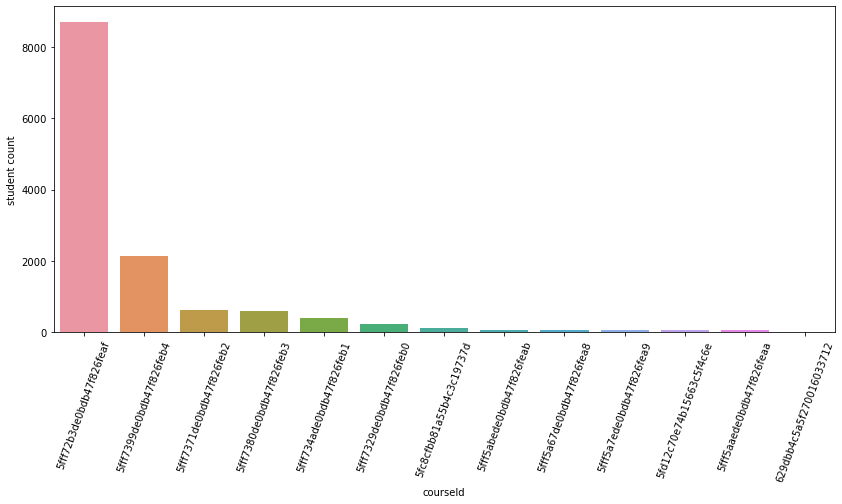

In [45]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=70)
sns.barplot(data=number_of_students,x='courseId',y='student count'
            ,order=number_of_students.sort_values('student count',ascending = False).courseId)
plt.show()

# Number of users per course

In [51]:
number_of_courses = enrolled_courses[['courseId','userId']].groupby(['userId']).agg(list)

In [53]:
number_of_courses = number_of_courses.reset_index()

In [54]:
number_of_courses['number of courses'] = number_of_courses['courseId'].apply(lambda x:len(set(x)))

In [59]:
number_of_courses[number_of_courses['number of courses']>1]

,userId,courseId,number of courses
31,601604c044b43c48f8a3a1b8,"[5fff734ade0bdb47f826feb1, 5fff7371de0bdb47f82...",2
45,601604c044b43c48f8a3a1c6,"[5fff72b3de0bdb47f826feaf, 5fff7371de0bdb47f82...",2
50,601604c044b43c48f8a3a1cb,"[5fff7380de0bdb47f826feb3, 5fff7399de0bdb47f82...",2
57,601604c044b43c48f8a3a1d2,"[5fff72b3de0bdb47f826feaf, 5fff7329de0bdb47f82...",3
69,601604c044b43c48f8a3a1de,"[5fff7371de0bdb47f826feb2, 5fff7380de0bdb47f82...",2
...,...,...,...
10904,61a5aa84b084830016832643,"[5fff7399de0bdb47f826feb4, 5fff7371de0bdb47f82...",2
11062,61be51aba132fe0016be0983,"[5fff7371de0bdb47f826feb2, 5fff734ade0bdb47f82...",2
11275,61cd5418d70c840016d370a4,"[5fff5aaede0bdb47f826feaa, 5fff5a67de0bdb47f82...",6
12505,6268ec130efdc00016cc89af,"[5fff7380de0bdb47f826feb3, 5fff7399de0bdb47f82...",2


In [60]:
number_of_courses[number_of_courses['number of courses']>5]

,userId,courseId,number of courses
89,601604c044b43c48f8a3a1f3,"[5fff72b3de0bdb47f826feaf, 5fff7329de0bdb47f82...",6
191,602e4bd458f23f05d209602f,"[5fff72b3de0bdb47f826feaf, 5fc8cfbb81a55b4c3c1...",12
214,603a1d9f88f8e80015827df3,"[5fff734ade0bdb47f826feb1, 5fff72b3de0bdb47f82...",6
233,603a32a988f8e80015827e32,"[5fff7329de0bdb47f826feb0, 5fff72b3de0bdb47f82...",6
257,603c9d866900f2001578a1ce,"[5fff72b3de0bdb47f826feaf, 5fff7329de0bdb47f82...",6
364,60704089a5a79c001505d24f,"[5fff72b3de0bdb47f826feaf, 5fff7329de0bdb47f82...",12
520,6082a59a3926fe29c8c7f1fd,"[5fff72b3de0bdb47f826feaf, 5fc8cfbb81a55b4c3c1...",12
539,6082a5aa3926fe29c8c7f223,"[5fff72b3de0bdb47f826feaf, 5fc8cfbb81a55b4c3c1...",13
2366,6082ab7e3926fe29c8c80069,"[5fff72b3de0bdb47f826feaf, 5fc8cfbb81a55b4c3c1...",12
4763,608cf4e9e697790015ee210d,"[nan, 5fff72b3de0bdb47f826feaf, 5fff7329de0bdb...",7


In [61]:
number_of_courses['number of courses'].value_counts()

1     12854
2        35
3        22
6        18
12        5
7         4
5         2
4         2
13        1
Name: number of courses, dtype: int64

C:\Users\alomo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number of courses', ylabel='count'>

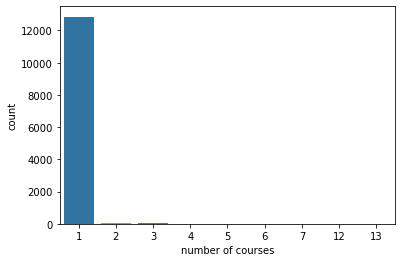

In [57]:
sns.countplot(number_of_courses['number of courses'])

In [42]:
number_of_courses[number_of_courses['courseId']>1] #just 91 students have taken more than 1 course

,courseId
userId,
601604c044b43c48f8a3a1b8,2
601604c044b43c48f8a3a1c6,2
601604c044b43c48f8a3a1cb,2
601604c044b43c48f8a3a1d2,3
601604c044b43c48f8a3a1de,2
...,...
61ace52cf77cd000167810fb,2
61be51aba132fe0016be0983,2
61cd5418d70c840016d370a4,6
